<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Pro/AI_HW1_Regression_with_inference_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (pro)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

random.seed(42)
np.random.seed(42)

### **Задание 0**
Для чего фиксируем сиды в домашках?

> Для того, чтобы была воспроизводимость результатов, например при разделении данных на train и test

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла)

In [3]:
# your code here
full_df = pd.concat([df_train, df_test])
full_df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

Пропущенные значения есть в столбцах mileage, engine, max_power, torque, seats

In [4]:
len(full_df[full_df.duplicated()])

1170

Всего 1170 явных дубликатов

In [5]:
from ydata_profiling import ProfileReport
profile = ProfileReport(full_df, title="Profiling Report")

In [6]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

__Вывод__

В столбцах mileage, engine, max_power, torque, seats есть пропуски. 

Данные содержат 607 дублирующихся строк

Столбцы mileage, engine, max_power, torque необходимо предобработать, привести к одним велечинам измерения и привести к численному виду

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [7]:
# your code here
df_train.describe()

year  selling_price     km_driven        seats
count  6999.000000   6.999000e+03  6.999000e+03  6797.000000
mean   2013.818403   6.395152e+05  6.958462e+04     5.419008
std       4.053095   8.089419e+05  5.772400e+04     0.965767
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.700000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

In [8]:
df_test.describe()

year  selling_price      km_driven       seats
count  1000.000000   1.000000e+03    1000.000000  981.000000
mean   2013.681000   6.179010e+05   71393.341000    5.410805
std       4.012149   7.585539e+05   48486.218662    0.919985
min    1995.000000   3.100000e+04    1303.000000    4.000000
25%    2011.000000   2.500000e+05   37000.000000    5.000000
50%    2014.000000   4.349990e+05   61500.000000    5.000000
75%    2017.000000   6.700000e+05  100000.000000    5.000000
max    2020.000000   6.000000e+06  375000.000000    9.000000

In [9]:
df_train.describe(include=['O'])

name    fuel seller_type transmission        owner  \
count                     6999    6999        6999         6999         6999   
unique                    1924       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner   
freq                       116    3793        5826         6095         4587   

          mileage   engine max_power          torque  
count        6797     6797      6803            6796  
unique        386      120       316             419  
top     18.9 kmpl  1248 CC    74 bhp  190Nm@ 2000rpm  
freq          197      885       330             468

In [10]:
df_test.describe(include=['O'])

name    fuel seller_type transmission        owner  \
count                  1000    1000        1000         1000         1000   
unique                  621       4           3            2            5   
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner   
freq                     15     534         837          877          623   

          mileage   engine max_power          torque  
count         981      981       981             981  
unique        237       88       182             226  
top     18.6 kmpl  1248 CC    74 bhp  200Nm@ 1750rpm  
freq           23      116        43              57

__Вывод__

В df_train и df_test есть сильное различие между медианой и средним для столбца 'selling_price', это может говорить о неравномерности выборки, но так как между df_train и df_test сильных различий нет по медиане и средним, то это не является выбросами

### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.05 балла)
- [ ] Отобразите такие объекты (0.05 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.05 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.05 балла)

In [11]:
# your code here
X = df_train.drop(columns='selling_price')
X.duplicated().sum()

np.int64(1159)

In [12]:
X[X.duplicated()]

name  year  km_driven    fuel  \
254                   Hyundai Grand i10 Sportz  2017      35000  Petrol   
258                           Maruti Swift VXI  2012      50000  Petrol   
268                     Maruti Swift Dzire VXI  2014      70000  Petrol   
324   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017       9000  Diesel   
325                              Lexus ES 300h  2019      20000  Petrol   
...                                        ...   ...        ...     ...   
6947                    Chevrolet Spark 1.0 LS  2010      60000  Petrol   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018      24000  Diesel   
6989                    Maruti Swift Dzire VDI  2015      50000  Diesel   
6997                           Tata Indigo CR4  2013      25000  Diesel   
6998                           Tata Indigo CR4  2013      25000  Diesel   

     seller_type transmission         owner     mileage   engine   max_power  \
254   Individual       Manual   First Owner   18.9 kmpl  1197 CC      82 bhp   
258   Individual       Manual  Second Owner   18.6 kmpl  1197 CC    85.8 bhp   
268   Individual       Manual  Second Owner   19.1 kmpl  1197 CC    85.8 bhp   
324       Dealer    Automatic   First Owner   13.6 kmpl  1999 CC     177 bhp   
325       Dealer    Automatic   First Owner  22.37 kmpl  2487 CC  214.56 bhp   
...          ...          ...           ...         ...      ...         ...   
6947  Individual       Manual  Second Owner   18.0 kmpl   995 CC      62 bhp   
6984  Individual       Manual   First Owner   24.4 kmpl  1498 CC   98.63 bhp   
6989  Individual       Manual   First Owner  26.59 kmpl  1248 CC      74 bhp   
6997  Individual       Manual   First Owner  23.57 kmpl  1396 CC      70 bhp   
6998  Individual       Manual   First Owner  23.57 kmpl  1396 CC      70 bhp   

                   torque  seats  
254        114Nm@ 4000rpm    5.0  
258        114Nm@ 4000rpm    5.0  
268        114Nm@ 4000rpm    5.0  
324   430Nm@ 1750-2500rpm    5.0  
325   202Nm@ 3600-5200rpm    5.0  
...                   ...    ...  
6947      90.3Nm@ 4200rpm    5.0  
6984  215Nm@ 1750-3000rpm    5.0  
6989       190Nm@ 2000rpm    5.0  
6997  140Nm@ 1800-3000rpm    5.0  
6998  140Nm@ 1800-3000rpm    5.0  

[1159 rows x 12 columns]

In [13]:
X = X.drop_duplicates()
df_train = df_train.loc[X.index]
df_train.reset_index(drop=True, inplace=True)

In [14]:
df_train

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
5835            Hyundai Santro Xing GLS  2008         120000     191000   
5836  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
5837                  Hyundai i20 Magna  2013         320000     110000   
5838              Hyundai Verna CRDi SX  2007         135000     119000   
5839             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner     mileage  \
0     Diesel  Individual       Manual           First Owner   23.4 kmpl   
1     Diesel  Individual       Manual          Second Owner  21.14 kmpl   
2     Diesel  Individual       Manual           First Owner   23.0 kmpl   
3     Petrol  Individual       Manual           First Owner   16.1 kmpl   
4     Petrol  Individual       Manual           First Owner  20.14 kmpl   
...      ...         ...          ...                   ...         ...   
5835  Petrol  Individual       Manual           First Owner  17.92 kmpl   
5836  Petrol  Individual       Manual          Second Owner   18.9 kmpl   
5837  Petrol  Individual       Manual           First Owner   18.5 kmpl   
5838  Diesel  Individual       Manual  Fourth & Above Owner   16.8 kmpl   
5839  Diesel  Individual       Manual           First Owner   19.3 kmpl   

       engine   max_power                     torque  seats  
0     1248 CC      74 bhp             190Nm@ 2000rpm    5.0  
1     1498 CC  103.52 bhp        250Nm@ 1500-2500rpm    5.0  
2     1396 CC      90 bhp   22.4 kgm at 1750-2750rpm    5.0  
3     1298 CC    88.2 bhp      11.5@ 4,500(kgm@ rpm)    5.0  
4     1197 CC   81.86 bhp          113.75nm@ 4000rpm    5.0  
...       ...         ...                        ...    ...  
5835  1086 CC    62.1 bhp            96.1Nm@ 3000rpm    5.0  
5836   998 CC    67.1 bhp              90Nm@ 3500rpm    5.0  
5837  1197 CC   82.85 bhp           113.7Nm@ 4000rpm    5.0  
5838  1493 CC     110 bhp  24@ 1,900-2,750(kgm@ rpm)    5.0  
5839  1248 CC    73.9 bhp             190Nm@ 2000rpm    5.0  

[5840 rows x 13 columns]

In [15]:
assert df_train.shape == (5840, 13)

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [16]:
# your code here
import re

def refact(text):
    pattern = r'[0-9.]+'
    match = re.search(pattern, text)
    if match:
        return float(match.group())
    else:
        return np.nan

In [17]:
# Здесь просто убрал размерности, потому что они примерно одного порядка
df_train['mileage'] = df_train['mileage'].apply(lambda x: refact(str(x)))

In [18]:
df_test['mileage'] = df_test['mileage'].apply(lambda x: refact(str(x)))

In [19]:
df_train['engine'] = df_train['engine'].apply(lambda x: refact(str(x)))

In [20]:
df_test['engine'] = df_test['engine'].apply(lambda x: refact(str(x)))

In [21]:
df_train['max_power'] = df_train['max_power'].apply(lambda x: refact(str(x)))

In [22]:
# Максимальная мощность не может быть равна 0, поэтому просто заполним потом медианой
df_train.loc[df_train['max_power'] == 0, 'max_power'] = np.nan

In [23]:
df_test['max_power'] = df_test['max_power'].apply(lambda x: refact(str(x)))

In [24]:
def refact_torque(text):
    pattern = r"(\d+\.?\d*)\s*(Nm|nm|kgm)?\s*(?:@|at)?\s*(\d+(?:,\d+)?(?:-\d+(?:,\d+)?)?)\s*\(?\s*(Nm|nm|kgm)?@?\s*rpm\)?"
    match = re.search(pattern, text)
    if match:
        value, unit1, rpm, unit2 = match.groups()
        unit = (unit1 or unit2).lower() if (unit1 or unit2) else None
        rpm = rpm.replace(',', '')
        if unit == 'kgm':
            value = float(value) * 9.81
        else:
            value = float(value)
        if '-' in rpm:
            # Беру максимльное число оборотов в минуту 
            rpm = float(rpm.split('-')[-1])
        else:
            rpm = float(rpm)
        return pd.Series({'torque': value, 'max_torque_rpm': rpm})
    return pd.Series({'torque': np.nan, 'max_torque_rpm': np.nan})

In [25]:
df_train[['torque', 'max_torque_rpm']] = df_train['torque'].apply(lambda x: refact_torque(str(x)))

In [26]:
df_test[['torque', 'max_torque_rpm']] = df_test['torque'].apply(lambda x: refact_torque(str(x)))

### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






In [27]:
# your code here
df_train['mileage'] = df_train['mileage'].fillna(df_train['mileage'].median())
df_train['engine'] = df_train['engine'].fillna(df_train['engine'].median())
df_train['max_power'] = df_train['max_power'].fillna(df_train['max_power'].median())
df_train['torque'] = df_train['torque'].fillna(df_train['torque'].median())
df_train['max_torque_rpm'] = df_train['max_torque_rpm'].fillna(df_train['max_torque_rpm'].median())
df_train['seats'] = df_train['seats'].fillna(df_train['seats'].median()) 

In [28]:
df_test['mileage'] = df_test['mileage'].fillna(df_train['mileage'].median())
df_test['engine'] = df_test['engine'].fillna(df_train['engine'].median())
df_test['max_power'] = df_test['max_power'].fillna(df_train['max_power'].median())
df_test['torque'] = df_test['torque'].fillna(df_train['torque'].median())
df_test['max_torque_rpm'] = df_test['max_torque_rpm'].fillna(df_train['max_torque_rpm'].median())
df_test['seats'] = df_test['seats'].fillna(df_train['seats'].median()) 

In [29]:
df_train.isnull().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
torque            0
seats             0
max_torque_rpm    0
dtype: int64

In [30]:
df_test.isnull().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
torque            0
seats             0
max_torque_rpm    0
dtype: int64

Стоит брать медиану, потому что она более устойчивая к выбросам, но можно применять и среднее, если есть уверенность, что данные распределены нормально и выбросы отсутствуют

Для заполнения используем только данные df_train, потому что мы не должны заглядывать в тест, чтобы полностью исключить вероятность какой-то подстройки под данные

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [31]:
# your code here
df_train['engine'] = df_train['engine'].apply(int)
df_train['seats'] = df_train['seats'].apply(int)

df_test['engine'] = df_test['engine'].apply(int)
df_test['seats'] = df_test['seats'].apply(int)

> У нас есть конкретные машины с конкретными сиденьями, то есть есть ограниченное количество вариаций значения признака

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [32]:
df_train.describe()

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.430841  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.985973   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power       torque        seats  max_torque_rpm  
count  5840.000000  5840.000000  5840.000000     5840.000000  
mean     87.948422   175.094509     5.426712     3037.715411  
std      31.577884   107.062175     0.982344      921.060210  
min      32.800000    47.088000     2.000000        0.000000  
25%      68.000000   111.800000     5.000000     2250.000000  
50%      81.860000   160.000000     5.000000     3000.000000  
75%      99.000000   200.000000     5.000000     4000.000000  
max     400.000000  1863.900000    14.000000    21800.000000

In [33]:
df_test.describe()

year  selling_price      km_driven     mileage      engine  \
count  1000.000000   1.000000e+03    1000.000000  1000.00000  1000.00000   
mean   2013.681000   6.179010e+05   71393.341000    19.33881  1454.87600   
std       4.012149   7.585539e+05   48486.218662     3.95175   521.99574   
min    1995.000000   3.100000e+04    1303.000000     0.00000   624.00000   
25%    2011.000000   2.500000e+05   37000.000000    16.55000  1197.00000   
50%    2014.000000   4.349990e+05   61500.000000    19.37000  1248.00000   
75%    2017.000000   6.700000e+05  100000.000000    22.30000  1582.00000   
max    2020.000000   6.000000e+06  375000.000000    32.26000  3604.00000   

         max_power       torque        seats  max_torque_rpm  
count  1000.000000  1000.000000  1000.000000     1000.000000  
mean     90.841670   176.805524     5.403000     3083.876000  
std      34.893389   102.895116     0.912921      888.991551  
min      34.200000    48.000000     4.000000        0.000000  
25%      69.000000   111.700000     5.000000     2500.000000  
50%      82.425000   160.000000     5.000000     3000.000000  
75%     102.000000   205.000000     5.000000     4000.000000  
max     280.000000  1422.450000     9.000000     5200.000000

`Your answer here`
> Заполнение пропусков могло сместить только распределение в тестовых данных, потому что заполняли значениями из трейн данных

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

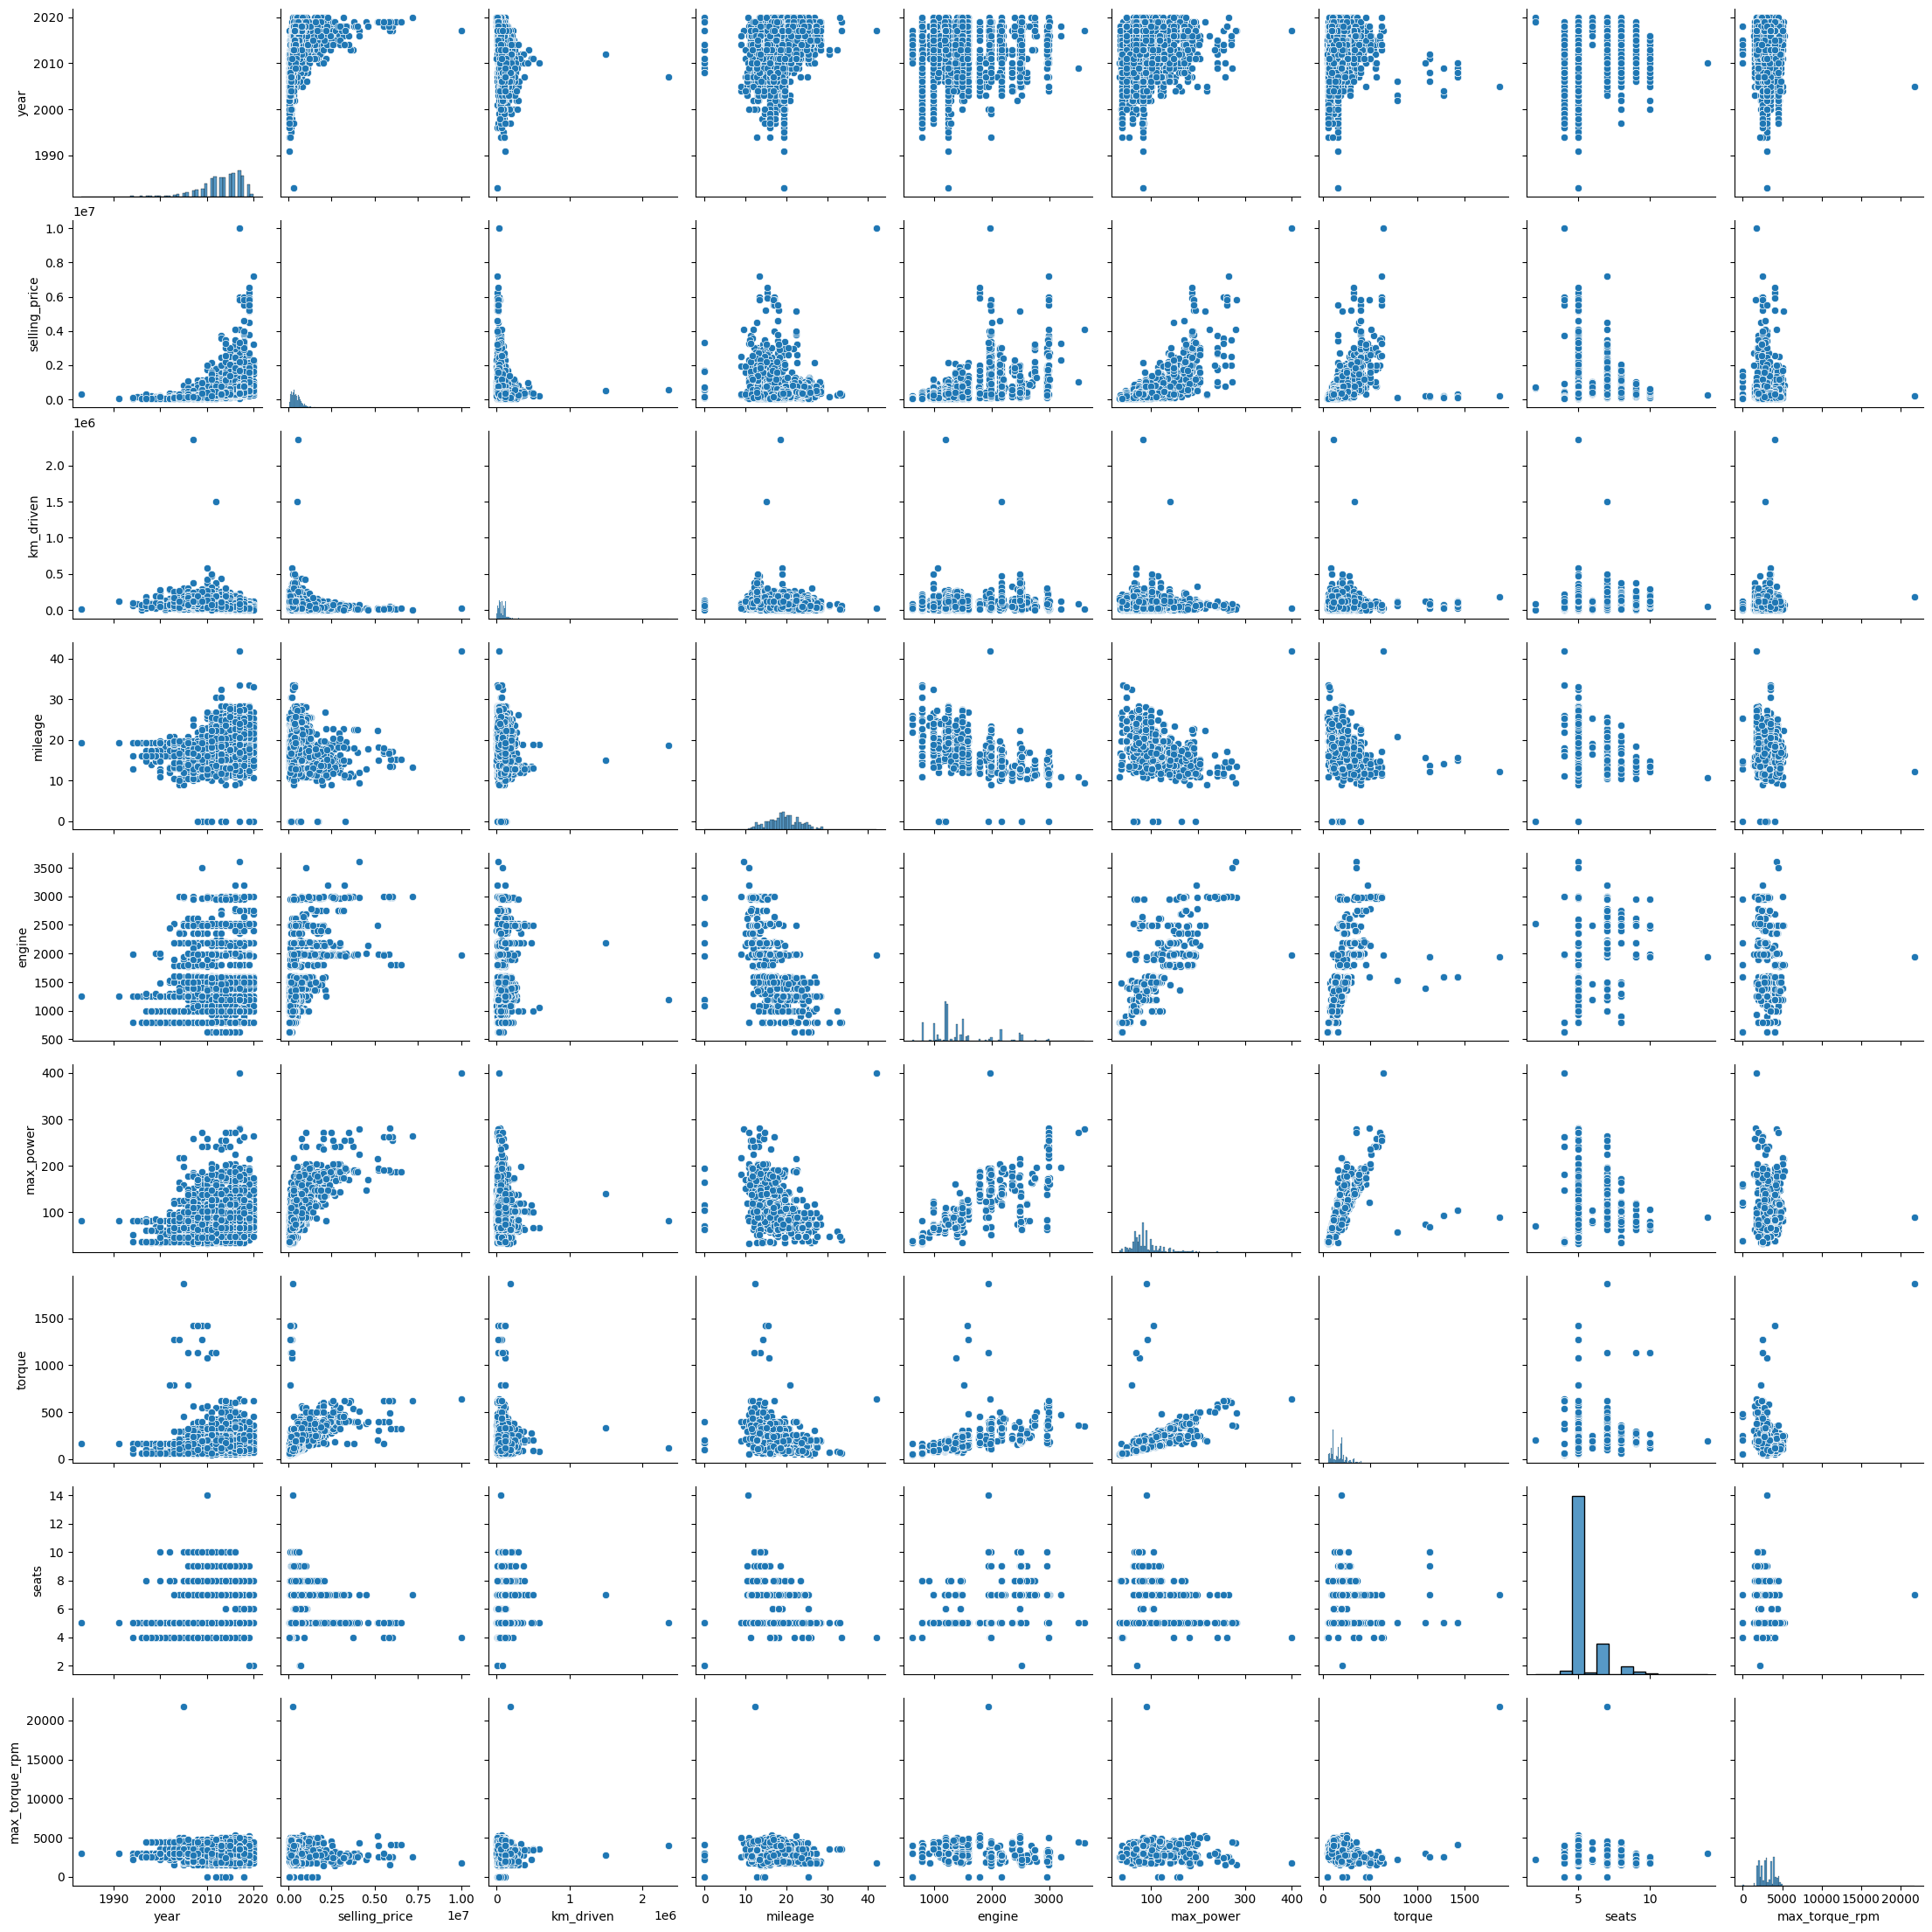

In [34]:
# your code here
sns.pairplot(df_train)

Можно увидеть прямую зависимость с целевой переменной у признаков 'max_power' и 'year' и обратную зависимость для 'km_driven'

Корреляцию можно увидеть между torque и max_power

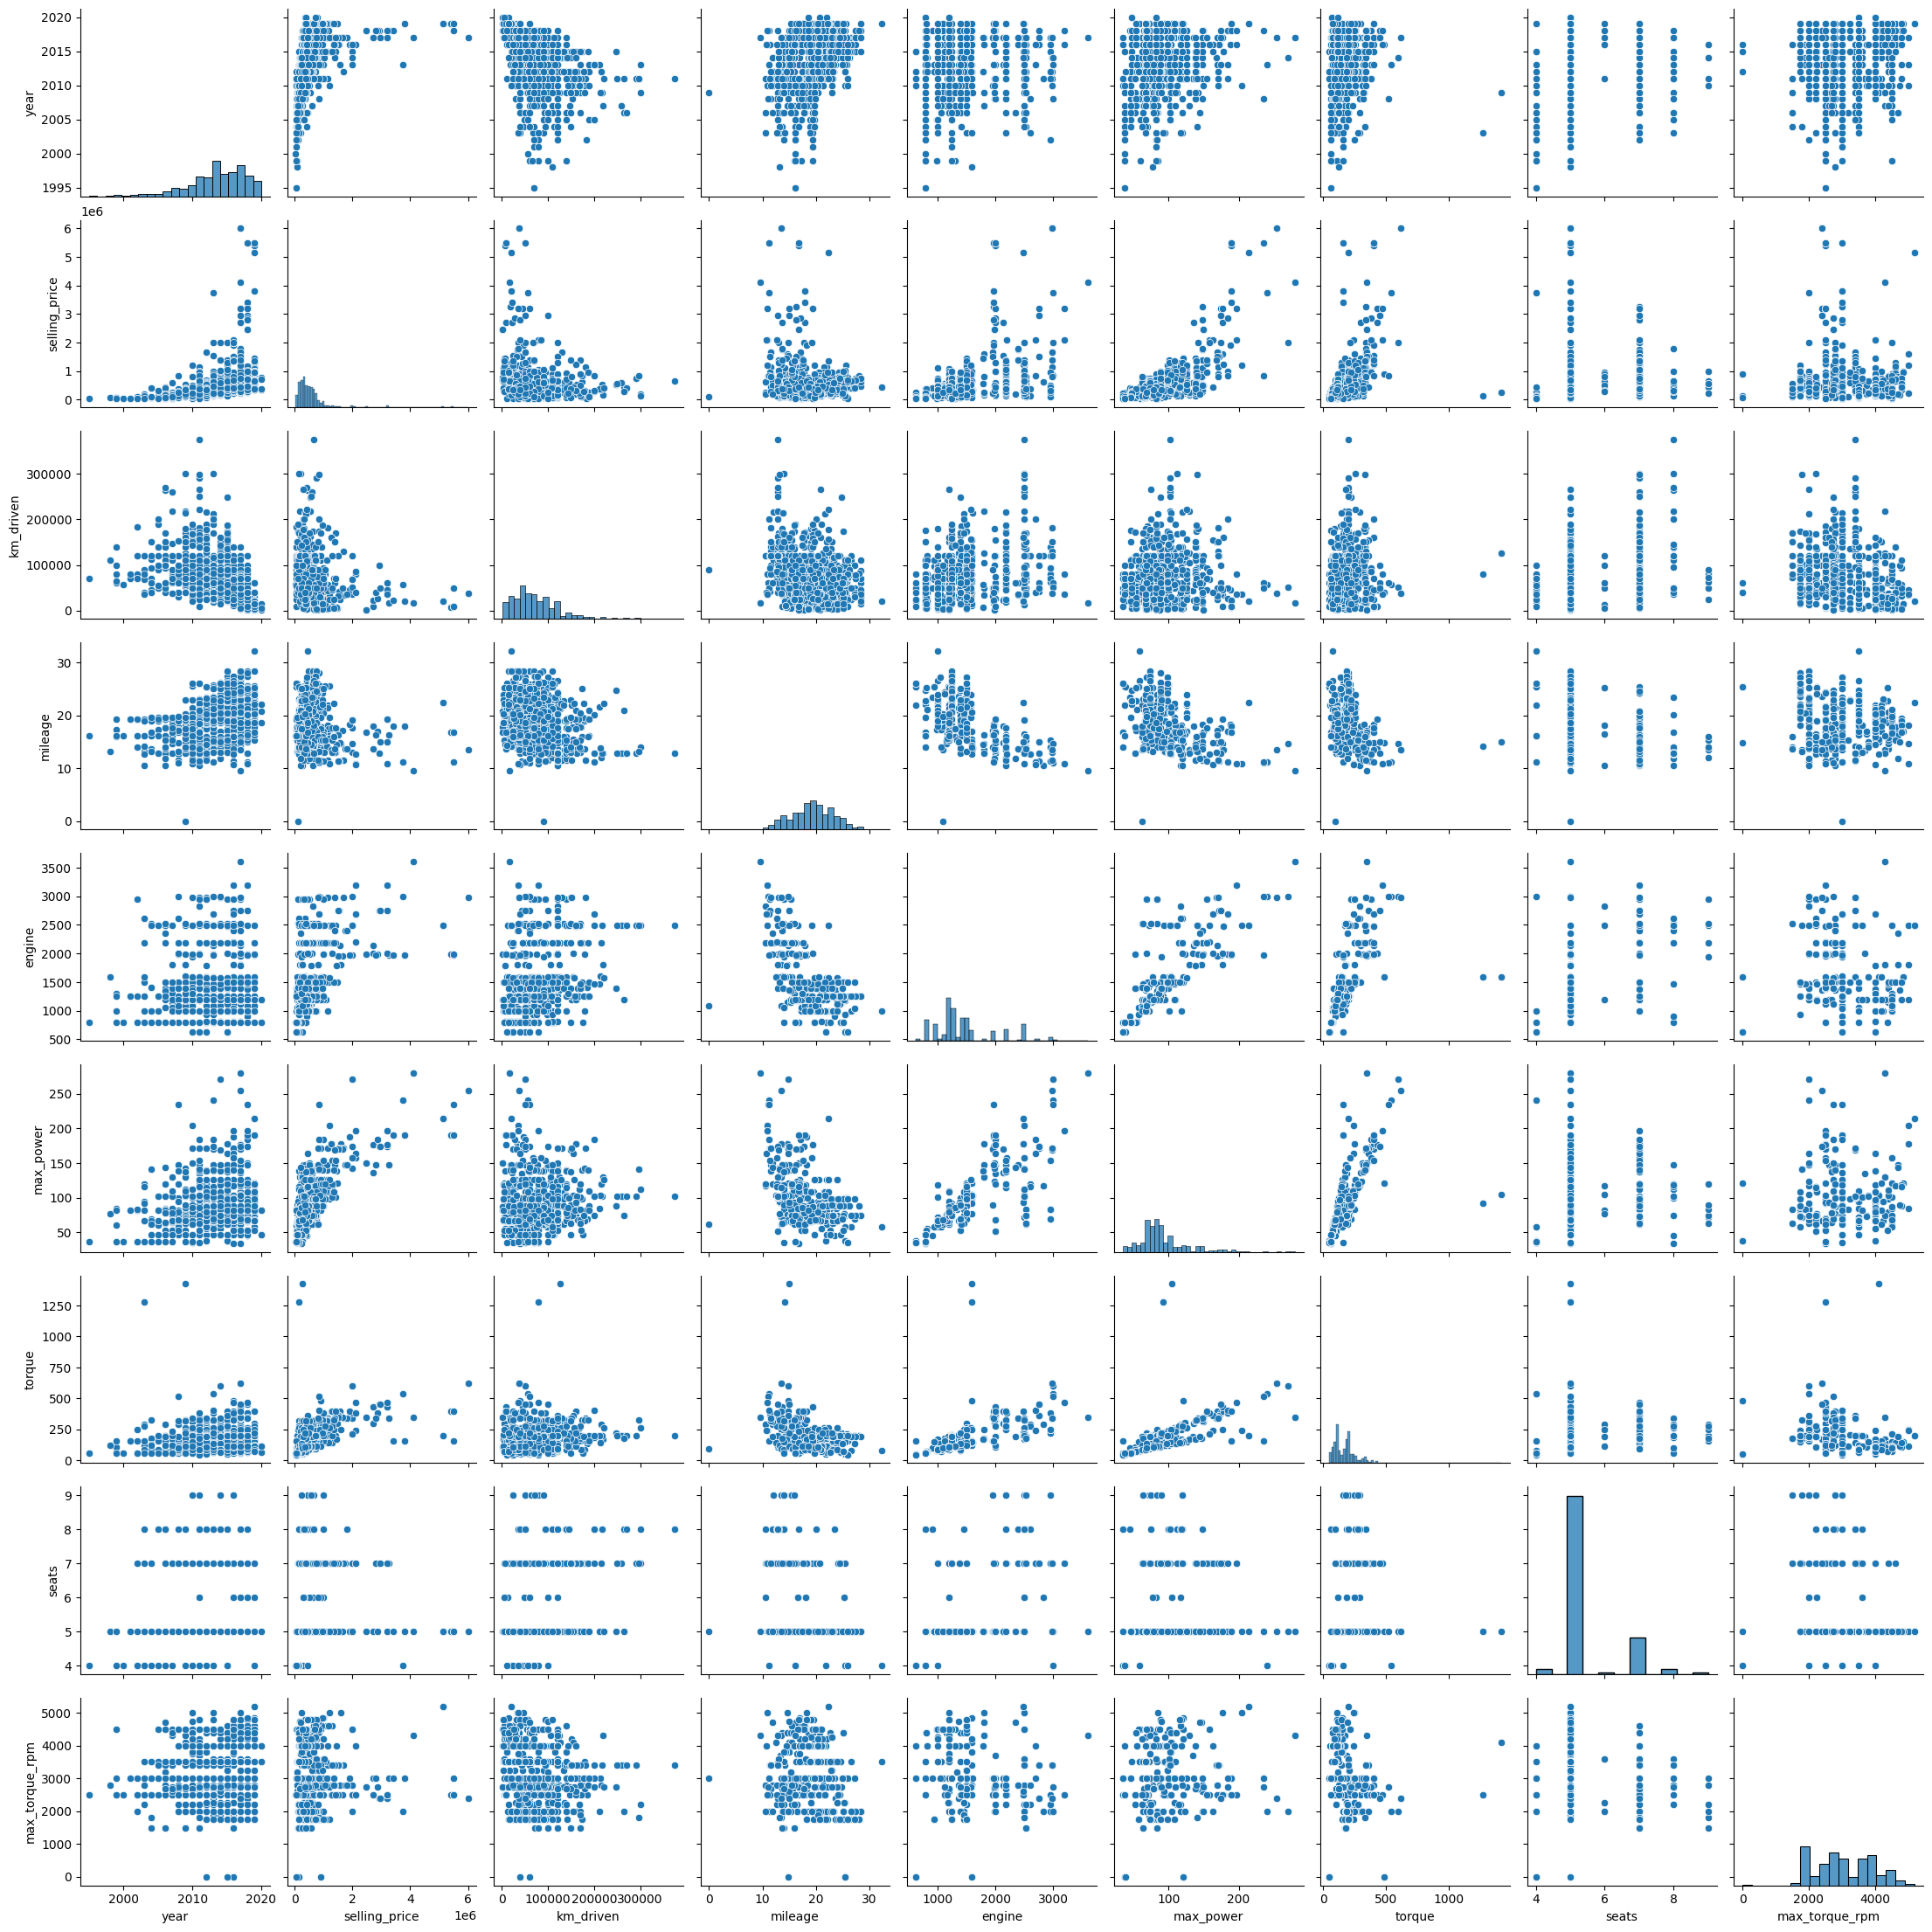

In [35]:
sns.pairplot(df_test)

Совокупности оказались похожими, но в тесте меньше аномалий, например для max_torque_rpm

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

<Axes: >

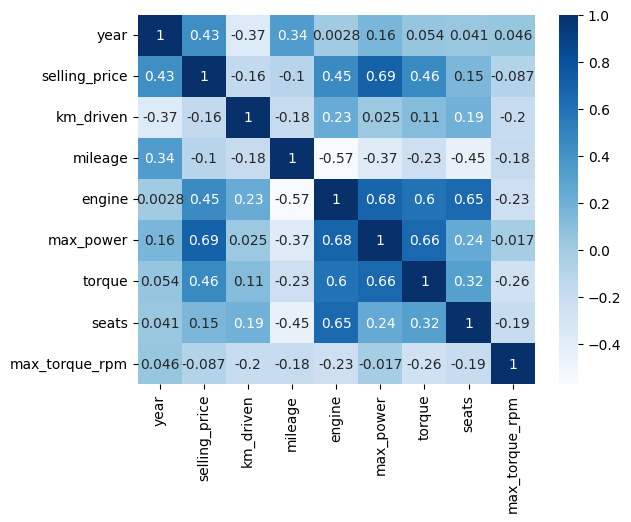

In [36]:
# your code here
corr = df_train[['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'max_torque_rpm']].corr()

sns.heatmap(corr, cmap="Blues", annot=True)

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

`Your answer here`
> Наименнее скоррелированы признаки year и engine
> 
> Наибольшая линейная зависимость у признаков max_power и engine
> 
> Да, наблюдается отрицательная линейная зависимость, то есть чем меньше год, тем больше машина проехала

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ]

Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


In [37]:
def calc_ranks(arr):
    sort_arr = np.argsort(arr)
    ranks = np.zeros_like(arr, dtype=float)
    
    ranks[sort_arr] = np.arange(1, len(arr) + 1)
    
    unique_values, unique_indices = np.unique(arr, return_index=True)
    
    for value, idx in zip(unique_values, unique_indices):
    
        same_value_indices = np.where(arr == value)[0]
        
    
        if len(same_value_indices) > 1:
            mean_rank = np.mean(ranks[same_value_indices])
            ranks[same_value_indices] = mean_rank
    
    return ranks

In [38]:
# your code here
def calculate_spear(df):
    df = df.apply(calc_ranks)
    spearman_cor_matrix = np.zeros((df.shape[1], df.shape[1]))
    for i in range(df.shape[1]):
        for j in range(df.shape[1]):
            x = df.iloc[:, i]
            y = df.iloc[:, j]
            d = x - y
            
            spearman_cor_matrix[i, j] = (1 - 6*np.sum(d**2)/(len(x)*(len(x)**2-1)))
    return spearman_cor_matrix
df = df_train[['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'max_torque_rpm']]

<Axes: >

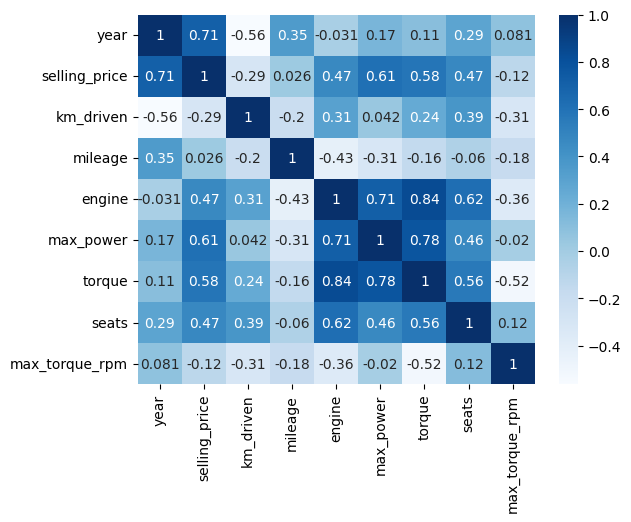

In [39]:
df = pd.DataFrame(calculate_spear(df), columns=df.columns, index = df.columns)
sns.heatmap(df, cmap="Blues", annot=True)

<Axes: >

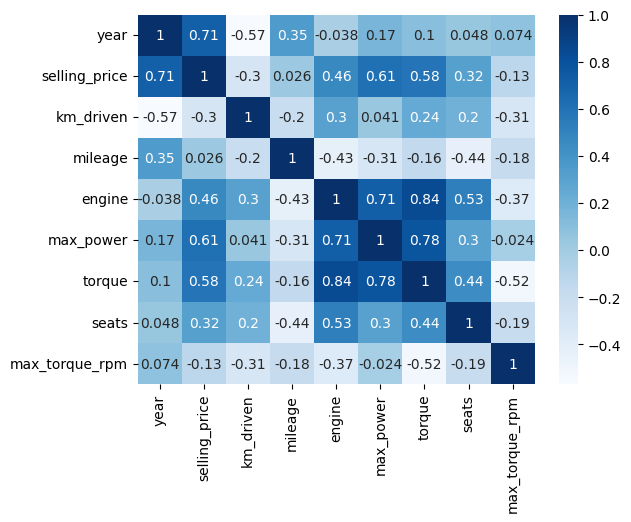

In [40]:
corr = df_train[['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'max_torque_rpm']].corr(method='spearman')

sns.heatmap(corr, cmap="Blues", annot=True)

Реализация оказалась полностью схожей

interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']


<Axes: >

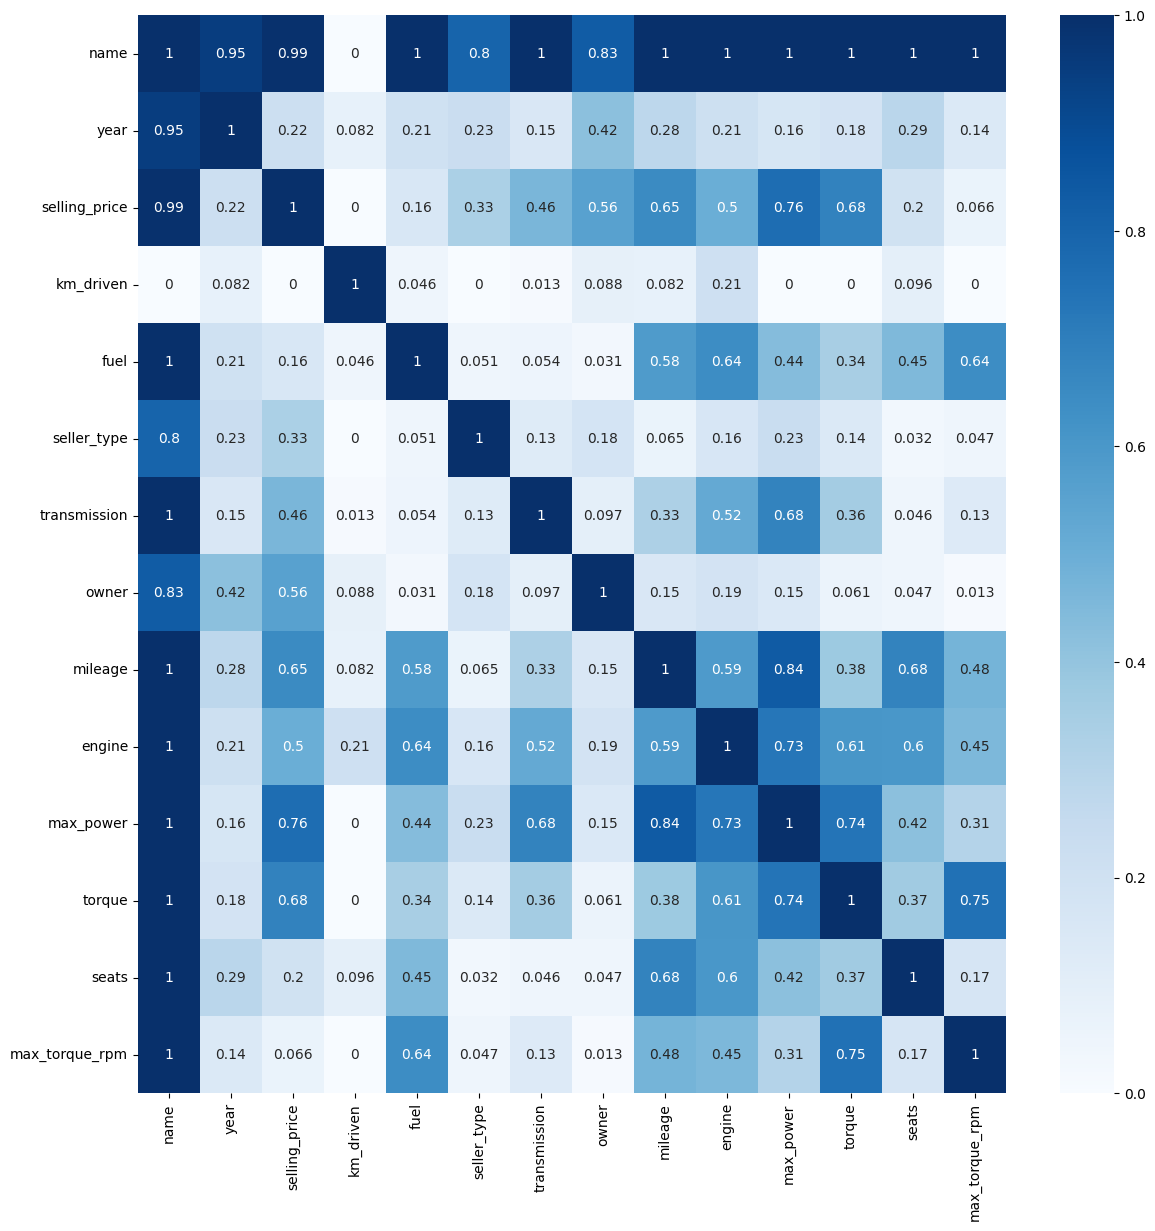

In [41]:
import phik

plt.figure(figsize=(14,14))

ph = df_train.phik_matrix()

sns.heatmap(ph, cmap="Blues", annot=True)

`Your answer here`
По phik можно отметить, что есть свзяь между владельцем и целевой переменной

### **Дополнительные визуализации (бонус 0.2 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [42]:
# your code here

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [43]:
y_train = df_train['selling_price']
X_train = df_train[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'max_torque_rpm']]

In [44]:
# assert X_train.shape == (5840, 6)

In [45]:
y_test = df_test['selling_price']
X_test = df_test[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'max_torque_rpm']]

In [46]:
# assert X_test.shape == (1000, 6)

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model_o = LinearRegression()

model_o.fit(X_train, y_train)

pred_train = model_o.predict(X_train)
pred_test = model_o.predict(X_test)

print('R2 для трейна:', r2_score(y_train, pred_train))
print('MSE для трейна:', MSE(y_train, pred_train))

print('R2 для теста:', r2_score(y_test, pred_test))
print('MSE для теста:', MSE(y_test, pred_test))

# your code here

R2 для трейна: 0.6017189128376245
MSE для трейна: 114162629023.59592
R2 для теста: 0.6006340809622028
MSE для теста: 229566934411.71686


### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

$$ R^2 = 1 - \frac{\sum_{i=1}^l{(a(x_i) - y_i)}^2}{\sum_{i=1}^l{(y_i - \bar{y})}^2}$$

In [48]:
def cool_r2_score(y, a):
    return 1 - (sum((a - y)**2)/sum((y-y.median())**2))
cool_r2_score(y_test, pred_test)

0.6225976720093629


$ a(x_i)$ - предсказаниемодели на обьекте i

$ y_i $ - реальное значение для обьекта i

$ \bar{y}$ - среднее значение целевой переменной


### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

In [49]:
# your code here
def adjusted_r2_score(y, a, p):
    return 1 - (1 - r2_score(y, a))*((len(a)-1)/(len(a)-p-1))
adjusted_r2_score(y_test, pred_test, len(X_train.columns))

0.5974101381243598

`Your answer here`
Применяется для определения надобности добавления новых признаков

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [50]:
from sklearn.preprocessing import StandardScaler

sca = StandardScaler()

sca.fit(X_train)

X_train = pd.DataFrame(sca.transform(X_train), columns = X_train.columns)

X_test = pd.DataFrame(sca.transform(X_test), columns = X_train.columns)

modelss = LinearRegression()

modelss.fit(X_train, y_train)

predss_train = modelss.predict(X_train) 
predss_test = modelss.predict(X_test)

print('R2 для трейна:', r2_score(y_train, predss_train))
print('MSE для трейна:', MSE(y_train, predss_train))

print('R2 для теста:', r2_score(y_test, predss_test))
print('MSE для теста:', MSE(y_test, predss_test))
# your code here

R2 для трейна: 0.6017189128376252
MSE для трейна: 114162629023.59567
R2 для теста: 0.6006340809622037
MSE для теста: 229566934411.71637


### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [51]:
modelss.coef_, modelss.intercept_

(array([ 1.64045122e+05, -4.85034725e+04, -5.69039795e+03,  2.37261373e+04,
         3.34311606e+05,  1.65791573e+02, -2.82142435e+04, -5.86620703e+04]),
 np.float64(522960.0910958865))

In [52]:
# your code here
print('Признак с самым большим по весу признаком:', X_train.columns[np.abs(modelss.coef_).argmax()])

Признак с самым большим по весу признаком: max_power


### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [53]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha = 400)

reg.fit(X_train, y_train)

pred_lasso_train = reg.predict(X_train)
pred_lasso_test = reg.predict(X_test)


print('R2 для трейна:', r2_score(y_train, pred_lasso_train))
print('MSE для трейна:', MSE(y_train, pred_lasso_train))

print('R2 для теста:', r2_score(y_test, pred_lasso_test))
print('MSE для теста:', MSE(y_test, pred_lasso_test))
# your code here

R2 для трейна: 0.6017111905220203
MSE для трейна: 114164842535.30899
R2 для теста: 0.6001291712449401
MSE для теста: 229857170935.21875


In [54]:
reg.coef_, reg.intercept_

(array([163136.03009201, -48140.78800269,  -4337.86754844,  22917.95893844,
        334836.08206644,      0.        , -26619.33132962, -57814.55448126]),
 np.float64(522960.0910958865))

Занулился признак torque, но при большом $ \alpha $ , потому что веса изначально были очень большими

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [55]:
# your code here
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
params = {'alpha' : [0.001, 0.01, 0.1, 0.5, 1, 10, 100, 500, 1000, 10000, 15000]}

model = Lasso()

lasso = GridSearchCV(model, params, cv=10, scoring='neg_mean_squared_error')
lasso.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.5, 1, 10, 100, 500, 1000,
                                   10000, 15000]},
             scoring='neg_mean_squared_error')

In [56]:
-lasso.best_score_, lasso.best_estimator_, lasso.best_params_

(np.float64(118973712483.96176), Lasso(alpha=10000), {'alpha': 10000})

In [57]:
pred_lasso_cv_train = lasso.predict(X_train)
pred_lasso_cv_test = lasso.predict(X_test)

print('R2 для трейна:', r2_score(y_train, pred_lasso_cv_train))
print('MSE для трейна:', MSE(y_train, pred_lasso_cv_train))

print('R2 для теста:', r2_score(y_test, pred_lasso_cv_test))
print('MSE для теста:', MSE(y_test, pred_lasso_cv_test))

R2 для трейна: 0.5991252118890814
MSE для трейна: 114906083153.68356
R2 для теста: 0.5872210714955165
MSE для теста: 237277115270.21695


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [58]:
# your code here
params = {'alpha' : [0.01, 0.1, 0.2, 0.3, 1, 10, 100], 'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}

model = ElasticNet()

gs = GridSearchCV(model, params, cv=10, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.01, 0.1, 0.2, 0.3, 1, 10, 100],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9]},
             scoring='neg_mean_squared_error')

In [59]:
-gs.best_score_, gs.best_estimator_, gs.best_params_

(np.float64(119113836766.60759),
 ElasticNet(alpha=0.2, l1_ratio=0.9),
 {'alpha': 0.2, 'l1_ratio': 0.9})

In [60]:
predgs_train = gs.predict(X_train)
predgs_test = gs.predict(X_test)

print('R2 для трейна:', r2_score(y_train, predgs_train))
print('MSE для трейна:', MSE(y_train, predgs_train))

print('R2 для теста:', r2_score(y_test, predgs_test))
print('MSE для теста:', MSE(y_test, predgs_test))

R2 для трейна: 0.6013516563967891
MSE для трейна: 114267898799.5482
R2 для теста: 0.5953688605964144
MSE для теста: 232593533429.70114


### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



In [61]:
# your code here
from sklearn.base import BaseEstimator, TransformerMixin
class L0():
    def __init__(self, alpha=0.1, threshold=10**(-3), l2_penalty = 0.7, max_iter=100):
        self.alpha = alpha
        self.threshold = threshold
        self.l2_penalty = l2_penalty
        self.max_iter = max_iter
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        X = X.values
        model = LinearRegression()
        model.fit(X, y)
        self.coef_ = model.coef_
        self.intercept_ = model.intercept_
        
        for _ in range(self.max_iter):
            self.coef_ -= self.l2_penalty * self.coef_
            self.coef_[np.abs(self.coef_) < self.threshold] = 0
            
            selected_features = np.where(self.coef_ != 0)[0]
            if len(selected_features) == 0:
                break
            
            model.fit(X[:, selected_features], y)
            self.coef_[selected_features] = model.coef_
            self.intercept_ = model.intercept_
        
        return self

    def predict(self, X):
        return np.dot(X.values, self.coef_) + self.intercept_    

In [62]:
l0 = L0(alpha = 10, threshold=100, max_iter=100)

l0.fit(X_train, y_train)

predl0_train = l0.predict(X_train)
predl0_test = l0.predict(X_test)

print('R2 для трейна:', r2_score(y_train, predl0_train))
print('MSE для трейна:', MSE(y_train, predl0_train))

print('R2 для теста:', r2_score(y_test, predl0_test))
print('MSE для теста:', MSE(y_test, predl0_test))

R2 для трейна: 0.6017188666595168
MSE для трейна: 114162642260.01195
R2 для теста: 0.6006483171055892
MSE для теста: 229558751069.97626


In [63]:
l0.coef_, l0.intercept_

(array([164034.17224959, -48502.9311417 ,  -5672.42515904,  23756.77882565,
        334404.41774311,      0.        , -28201.53060371, -58690.53075812]),
 np.float64(522960.0910958865))

# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [64]:
# your code here
X_train_cat = df_train.drop('selling_price', axis=1)
X_train_cat['name'] = X_train_cat['name'].apply(lambda x: x.split()[0])

In [65]:
assert X_train_cat.shape == (5840, 13)

In [66]:
X_train_cat.describe(include='object')

name    fuel seller_type transmission        owner
count     5840    5840        5840         5840         5840
unique      30       4           3            2            5
top     Maruti  Diesel  Individual       Manual  First Owner
freq      1804    3177        5223         5336         3603

In [67]:
X_train_cat['name'].value_counts()

name
Maruti           1804
Hyundai          1058
Mahindra          611
Tata              534
Toyota            309
Ford              308
Honda             308
Chevrolet         188
Renault           171
Volkswagen        153
Nissan             63
Skoda              61
Datsun             49
Mercedes-Benz      44
BMW                41
Fiat               39
Audi               31
Jeep               20
Mitsubishi          8
Volvo               8
Jaguar              7
Force               4
Isuzu               4
Land                3
Kia                 3
MG                  3
Ambassador          3
Daewoo              3
Lexus               1
Peugeot             1
Name: count, dtype: int64

### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [68]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


X_train_cat = df_train.drop('selling_price', axis=1)
X_train_cat['name'] = X_train_cat['name'].apply(lambda x: x.split()[0])
X_test_cat = df_test.drop('selling_price', axis=1)
X_test_cat['name'] = X_test_cat['name'].apply(lambda x: x.split()[0])
categorical_columns = ['name', 'fuel', 'seller_type', 'transmission', 'owner']

preprocessor = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_columns)
    ],
    remainder="passthrough"
)

preprocessor.fit(X_train_cat)
encoded_data = preprocessor.transform(X_train_cat)
X_train_cat = pd.DataFrame(
    encoded_data,
    columns=preprocessor.get_feature_names_out(),
)
encoded_data = preprocessor.transform(X_test_cat)

X_test_cat = pd.DataFrame(
    encoded_data,
    columns=preprocessor.get_feature_names_out(),
)
X_train_cat

onehot__name_Audi  onehot__name_BMW  onehot__name_Chevrolet  \
0                   0.0               0.0                     0.0   
1                   0.0               0.0                     0.0   
2                   0.0               0.0                     0.0   
3                   0.0               0.0                     0.0   
4                   0.0               0.0                     0.0   
...                 ...               ...                     ...   
5835                0.0               0.0                     0.0   
5836                0.0               0.0                     0.0   
5837                0.0               0.0                     0.0   
5838                0.0               0.0                     0.0   
5839                0.0               0.0                     0.0   

      onehot__name_Daewoo  onehot__name_Datsun  onehot__name_Fiat  \
0                     0.0                  0.0                0.0   
1                     0.0                  0.0                0.0   
2                     0.0                  0.0                0.0   
3                     0.0                  0.0                0.0   
4                     0.0                  0.0                0.0   
...                   ...                  ...                ...   
5835                  0.0                  0.0                0.0   
5836                  0.0                  0.0                0.0   
5837                  0.0                  0.0                0.0   
5838                  0.0                  0.0                0.0   
5839                  0.0                  0.0                0.0   

      onehot__name_Force  onehot__name_Ford  onehot__name_Honda  \
0                    0.0                0.0                 0.0   
1                    0.0                0.0                 0.0   
2                    0.0                0.0                 0.0   
3                    0.0                0.0                 0.0   
4                    0.0                0.0                 0.0   
...                  ...                ...                 ...   
5835                 0.0                0.0                 0.0   
5836                 0.0                0.0                 0.0   
5837                 0.0                0.0                 0.0   
5838                 0.0                0.0                 0.0   
5839                 0.0                0.0                 0.0   

      onehot__name_Hyundai  ...  onehot__owner_Test Drive Car  \
0                      0.0  ...                           0.0   
1                      0.0  ...                           0.0   
2                      1.0  ...                           0.0   
3                      0.0  ...                           0.0   
4                      1.0  ...                           0.0   
...                    ...  ...                           ...   
5835                   1.0  ...                           0.0   
5836                   0.0  ...                           0.0   
5837                   1.0  ...                           0.0   
5838                   1.0  ...                           0.0   
5839                   0.0  ...                           0.0   

      onehot__owner_Third Owner  remainder__year  remainder__km_driven  \
0                           0.0           2014.0              145500.0   
1                           0.0           2014.0              120000.0   
2                           0.0           2010.0              127000.0   
3                           0.0           2007.0              120000.0   
4                           0.0           2017.0               45000.0   
...                         ...              ...                   ...   
5835                        0.0           2008.0              191000.0   
5836                        0.0           2013.0               50000.0   
5837                        0.0           2013.0              110000.0   
5838                  

### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

`Your answer here`
> Корректно обучать его только на трейне и удалить из него один столбец для избежания линейной зависимости в признаках. Если в тесте будет новое значение признака, то он просто будет равен 0
>
> Не важные по весам можно удалять, так как снижение количества признаков понижает сложность модели

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [69]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

params = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10]}

model = Ridge()

ridge = GridSearchCV(model, params, cv=10, scoring='neg_mean_squared_error')
ridge.fit(X_train_cat, y_train)
# your code here

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10]},
             scoring='neg_mean_squared_error')

In [70]:
-ridge.best_score_, ridge.best_estimator_, ridge.best_params_

(np.float64(83258979947.3041), Ridge(alpha=0.0001), {'alpha': 0.0001})

In [71]:
pred_r_train = ridge.predict(X_train_cat)
pred_r_test = ridge.predict(X_test_cat)

print('R2 для трейна:', r2_score(y_train, pred_r_train))
print('MSE для трейна:', MSE(y_train, pred_r_train))

print('R2 для теста:', r2_score(y_test, pred_r_test))
print('MSE для теста:', MSE(y_test, pred_r_test))

R2 для трейна: 0.7656521982220492
MSE для трейна: 67173064499.4552
R2 для теста: 0.7849278635832218
MSE для теста: 123629605534.53114


In [73]:
#Модель для сервиса
# from sklearn.pipeline import Pipeline
# preprocessor = ColumnTransformer(
    # transformers=[
        # ("onehot", OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_columns)
    # ],
    # remainder="passthrough"
# )
# pipline = Pipeline(
    # steps=[("preprocessor", preprocessor),
           # ("regressor", Ridge(alpha=0.0001))])
# pipline.fit(X_train_cat, y_train)
# pipline

In [ ]:
import pickle

with open('pipline.pickle', 'wb') as f:
    pickle.dump(pipline, f)

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [74]:
# your code here
feature_X_train = X_train_cat.copy()
feature_X_test = X_test_cat.copy()

In [75]:
feature_X_train['power_per_liter'] = feature_X_train['remainder__max_power'] / feature_X_train['remainder__engine']
feature_X_train['year_squared'] = feature_X_train['remainder__year'] ** 2
feature_X_train['log_km_driven'] = np.log1p(feature_X_train['remainder__km_driven'])
feature_X_train['log_torque'] = np.log1p(feature_X_train['remainder__torque'])

In [76]:
feature_X_test['power_per_liter'] = feature_X_test['remainder__max_power'] / feature_X_test['remainder__engine']
feature_X_test['year_squared'] = feature_X_test['remainder__year'] ** 2
feature_X_test['log_km_driven'] = np.log1p(feature_X_test['remainder__km_driven'])
feature_X_test['log_torque'] = np.log1p(feature_X_test['remainder__torque'])

In [77]:
feature_X_train = feature_X_train.drop(['remainder__max_power', 'remainder__engine', 'remainder__year', 'remainder__km_driven', 'log_torque'], axis=1)
feature_X_test = feature_X_test.drop(['remainder__max_power', 'remainder__engine', 'remainder__year', 'remainder__km_driven', 'log_torque'], axis=1)

In [78]:
params = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10]}

model = Ridge()

ridge_fe = GridSearchCV(model, params, cv=10, scoring='neg_mean_squared_error')
ridge_fe.fit(feature_X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10]},
             scoring='neg_mean_squared_error')

In [79]:
-ridge_fe.best_score_, ridge_fe.best_estimator_, ridge_fe.best_params_

(np.float64(91036039886.02205), Ridge(alpha=0.0001), {'alpha': 0.0001})

In [80]:
pred_fe_train = ridge_fe.predict(feature_X_train)
pred_fe_test = ridge_fe.predict(feature_X_test)

print('R2 для трейна:', r2_score(y_train, pred_fe_train))
print('MSE для трейна:', MSE(y_train, pred_fe_train))

print('R2 для теста:', r2_score(y_test, pred_fe_test))
print('MSE для теста:', MSE(y_test, pred_fe_test))

R2 для трейна: 0.7402603718029828
MSE для трейна: 74451335432.08826
R2 для теста: 0.7604754771105438
MSE для теста: 137685535532.53366


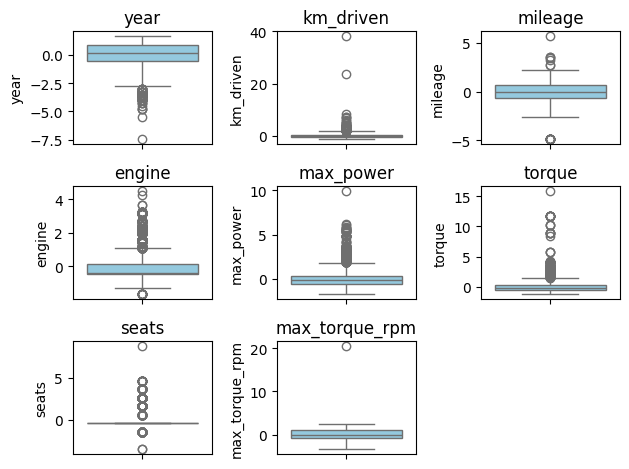

In [81]:
for i, column in enumerate(X_train.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(X_train[column], color="skyblue")
    plt.title(column)
    plt.tight_layout()
plt.show()

In [82]:
df_test.loc[1]

name              Tata Nexon 1.5 Revotorq XE
year                                    2017
selling_price                         665000
km_driven                              25000
fuel                                  Diesel
seller_type                       Individual
transmission                          Manual
owner                            First Owner
mileage                                 21.5
engine                                  1497
max_power                              108.5
torque                                 260.0
seats                                      5
max_torque_rpm                        2750.0
Name: 1, dtype: object

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [83]:
def business_metrics(y_true, y_pred):
    # your code here
    return sum(np.abs(y_true-y_pred)/y_true <= 0.1)/len(y_true)


print('Бизнес метрика для трейна:', business_metrics(y_train, pred_train))
print('Бизнес метрика для теста:', business_metrics(y_test, pred_test))

print('Бизнес метрика для трейна с нормировкой:', business_metrics(y_train, predss_train))
print('Бизнес метрика для трейна с нормировкой:', business_metrics(y_test, predss_test))

print('Бизнес метрика для трейна Lasso:', business_metrics(y_train, pred_lasso_train))
print('Бизнес метрика для теста Lasso:', business_metrics(y_test, pred_lasso_test))

print('Бизнес метрика для трейна Lasso c cv:', business_metrics(y_train, pred_lasso_cv_train))
print('Бизнес метрика для теста Lasso c cv:', business_metrics(y_test, pred_lasso_cv_test))

print('Бизнес метрика для трейна Elastic Net:', business_metrics(y_train, predgs_train))
print('Бизнес метрика для теста Elastic Net:', business_metrics(y_test, predgs_test))

print('Бизнес метрика для трейна L0:', business_metrics(y_train, predl0_train))
print('Бизнес метрика для теста L0:', business_metrics(y_test, predl0_test))

print('Бизнес метрика для трейна ridge с категориальными:', business_metrics(y_train, pred_r_train))
print('Бизнес метрика для теста ridge с категориальными:', business_metrics(y_test, pred_r_test))  

print('Бизнес метрика для трейна ridge после Feature Engineering:', business_metrics(y_train, pred_fe_train))
print('Бизнес метрика для теста ridge после Feature Engineering:', business_metrics(y_test, pred_fe_test))  

Бизнес метрика для трейна: 0.21763698630136985
Бизнес метрика для теста: 0.239
Бизнес метрика для трейна с нормировкой: 0.21763698630136985
Бизнес метрика для трейна с нормировкой: 0.239
Бизнес метрика для трейна Lasso: 0.21780821917808219
Бизнес метрика для теста Lasso: 0.239
Бизнес метрика для трейна Lasso c cv: 0.22397260273972602
Бизнес метрика для теста Lasso c cv: 0.244
Бизнес метрика для трейна Elastic Net: 0.22123287671232877
Бизнес метрика для теста Elastic Net: 0.241
Бизнес метрика для трейна L0: 0.21797945205479452
Бизнес метрика для теста L0: 0.239
Бизнес метрика для трейна ridge с категориальными: 0.2727739726027397
Бизнес метрика для теста ridge с категориальными: 0.286
Бизнес метрика для трейна ridge после Feature Engineering: 0.24383561643835616
Бизнес метрика для теста ridge после Feature Engineering: 0.27


Лучше всего бизнес задачу решает модель с Ridge регрессией с категориальными признаками

### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



In [84]:
def your_business_metrics(y_true, y_pred, alpha=2):
    err = np.abs(y_true - y_pred)
    w = np.where(y_pred < y_true, alpha, 1)
    w_err = err * w
    return np.mean(w_err)

print('Бизнес метрика для трейна:', your_business_metrics(y_train, pred_train))
print('Бизнес метрика для теста:', your_business_metrics(y_test, pred_test))

print('Бизнес метрика для трейна с нормировкой:', your_business_metrics(y_train, predss_train))
print('Бизнес метрика для трейна с нормировкой:', your_business_metrics(y_test, predss_test))

print('Бизнес метрика для трейна Lasso:', your_business_metrics(y_train, pred_lasso_train))
print('Бизнес метрика для теста Lasso:', your_business_metrics(y_test, pred_lasso_test))

print('Бизнес метрика для трейна Lasso c cv:', your_business_metrics(y_train, pred_lasso_cv_train))
print('Бизнес метрика для теста Lasso c cv:', your_business_metrics(y_test, pred_lasso_cv_test))

print('Бизнес метрика для трейна Elastic Net:', your_business_metrics(y_train, predgs_train))
print('Бизнес метрика для теста Elastic Net:', your_business_metrics(y_test, predgs_test))

print('Бизнес метрика для трейна L0:', your_business_metrics(y_train, predl0_train))
print('Бизнес метрика для теста L0:', your_business_metrics(y_test, predl0_test))

print('Бизнес метрика для трейна ridge с категориальными:', your_business_metrics(y_train, pred_r_train))
print('Бизнес метрика для теста ridge с категориальными:', your_business_metrics(y_test, pred_r_test))  

print('Бизнес метрика для трейна ridge после Feature Engineering:', your_business_metrics(y_train, pred_fe_train))
print('Бизнес метрика для теста ridge после Feature Engineering:', your_business_metrics(y_test, pred_fe_test)) 

Бизнес метрика для трейна: 270271.576235961
Бизнес метрика для теста: 358533.58402392815
Бизнес метрика для трейна с нормировкой: 270271.57623596606
Бизнес метрика для трейна с нормировкой: 358533.58402393415
Бизнес метрика для трейна Lasso: 269962.7336227679
Бизнес метрика для теста Lasso: 358427.8419089778
Бизнес метрика для трейна Lasso c cv: 265067.40748436196
Бизнес метрика для теста Lasso c cv: 356971.6071758264
Бизнес метрика для трейна Elastic Net: 267375.83434425393
Бизнес метрика для теста Elastic Net: 357295.4554789649
Бизнес метрика для трейна L0: 270268.7786252553
Бизнес метрика для теста L0: 358525.6695384854
Бизнес метрика для трейна ridge с категориальными: 203679.88659675498
Бизнес метрика для теста ridge с категориальными: 256840.16754135286
Бизнес метрика для трейна ridge после Feature Engineering: 215934.12879642803
Бизнес метрика для теста ridge после Feature Engineering: 272051.5625951653


Наиболее маленьку ошибку выдает модель Ridge с категориальными признаками, ее и буду брать для FastAPI

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 25**

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [93]:
%%writefile main.py

from fastapi import FastAPI, File, UploadFile, HTTPException
from pydantic import BaseModel
from typing import List, Dict
from fastapi.encoders import jsonable_encoder
import numpy as np
import pandas as pd
import pickle
import re
import io

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]
    
def refact(text: str):
    pattern = r'[0-9.]+'
    match = re.search(pattern, text)
    if match:
        return float(match.group())
    else:
        return np.nan

def refact_torque(text: str) -> pd.Series:
    pattern = r"(\d+\.?\d*)\s*(Nm|nm|kgm)?\s*(?:@|at)?\s*(\d+(?:,\d+)?(?:-\d+(?:,\d+)?)?)\s*\(?\s*(Nm|nm|kgm)?@?\s*rpm\)?"
    match = re.search(pattern, text)
    if match:
        value, unit1, rpm, unit2 = match.groups()
        unit = (unit1 or unit2).lower() if (unit1 or unit2) else None
        rpm = rpm.replace(',', '')
        if unit == 'kgm':
            value = float(value) * 9.81
        else:
            value = float(value)
        if '-' in rpm:
            # Беру максимльное число оборотов в минуту 
            rpm = float(rpm.split('-')[-1])
        else:
            rpm = float(rpm)
        return pd.Series({'torque': value, 'max_torque_rpm': rpm})
    return pd.Series({'torque': np.nan, 'max_torque_rpm': np.nan})

def transform_predict(item: Item) -> float:
    
    df = pd.DataFrame([item.dict()])
    
    df['mileage'] = df['mileage'].apply(lambda x: refact(str(x)))
    df['engine'] = df['engine'].apply(lambda x: refact(str(x)))
    df['max_power'] = df['max_power'].apply(lambda x: refact(str(x)))
    df[['torque', 'max_torque_rpm']] = df['torque'].apply(lambda x: refact_torque(str(x)))
    
    df['engine'] = df['engine'].apply(int)
    df['seats'] = df['seats'].apply(int)

    df['name'] = df['name'].apply(lambda x: x.split()[0])

    with open("pipline.pickle", 'rb') as f:
        pipeline = pickle.load(f)

    pred = pipeline.predict(df);
    
    return pred

def transform_predict_csv(df: pd.DataFrame) -> List[float]:
    df['mileage'] = df['mileage'].apply(lambda x: refact(str(x)))
    df['engine'] = df['engine'].apply(lambda x: refact(str(x)))
    df['max_power'] = df['max_power'].apply(lambda x: refact(str(x)))
    df[['torque', 'max_torque_rpm']] = df['torque'].apply(lambda x: refact_torque(str(x)))
    
    df['engine'] = df['engine'].apply(int)
    df['seats'] = df['seats'].apply(int)

    df['name'] = df['name'].apply(lambda x: x.split()[0])

    with open("pipline.pickle", 'rb') as f:
        pipeline = pickle.load(f)

    pred = pipeline.predict(df);
    
    return pred    

    
@app.post("/predict_item")
def predict_item(item: Item) -> float:
    res = transform_predict(item)
    return res[0]
    
@app.post("/predict_items")
def predict_items(file: UploadFile = File(...)) -> List[float]:
    contents = file.file.read()
    buffer = io.BytesIO(contents)
    df = pd.read_csv(buffer, sep=';')
    buffer.close()
    file.file.close()
    res = transform_predict_csv(df)
    return res

Overwriting main.py


Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 26**

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией

3. Просматривает ноутбук с DS частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/Kz1ZRWj)

</details>

@murr4a